<a href="https://colab.research.google.com/github/Natalia-git97/Brent-Oil-Times-series/blob/main/Brent_Oil_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BrentOilPrices.csv')

In [ ]:

import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [ ]:
data.set_index('Date', inplace=True)
data.head(5)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [ ]:
X_train = data.loc['2006-01-01':'2018-12-31']

In [ ]:
X_train

,Price
Date,
2006-01-03,61.51
2006-01-04,61.25
2006-01-05,61.68
2006-01-06,62.43
2006-01-09,62.51
...,...
2018-12-19,55.60
2018-12-20,52.84
2018-12-21,51.93


In [ ]:
# Create train set of adj close prices data:
train_data = X_train['Price'].to_numpy()
print(train_data.shape) # 1258 

(3283,)


In [ ]:
# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

In [ ]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Create the data to train our model on:
time_steps = 20
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 20, 1))

print(X_train.shape)

(3263, 20, 1)


In [ ]:
# Visualizing our data with prints: 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

X_train:
[[61.51]
 [61.25]
 [61.68]
 [62.43]
 [62.51]
 [62.32]
 [61.54]
 [62.95]
 [61.58]
 [62.34]
 [63.22]
 [63.6 ]
 [63.64]
 [64.92]
 [64.56]
 [63.82]
 [62.61]
 [62.93]
 [64.95]
 [65.14]]


y_train: [[63.19]]



In [ ]:
# Build the model 
model = keras.Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#earlystop
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30, shuffle=False, callbacks=[es_callback])

Epoch 1/20
229/229 [==============================] - 11s 32ms/step - loss: 0.0092 - val_loss: 0.0052
Epoch 2/20
229/229 [==============================] - 7s 30ms/step - loss: 0.0074 - val_loss: 0.0088
Epoch 3/20
229/229 [==============================] - 7s 31ms/step - loss: 0.0094 - val_loss: 0.0139
Epoch 4/20
229/229 [==============================] - 7s 31ms/step - loss: 0.0124 - val_loss: 0.0173
Epoch 5/20
229/229 [==============================] - 6s 27ms/step - loss: 0.0204 - val_loss: 0.0261
Epoch 6/20
229/229 [==============================] - 7s 30ms/step - loss: 0.0216 - val_loss: 0.0361
Epoch 7/20
229/229 [==============================] - 7s 30ms/step - loss: 0.0180 - val_loss: 0.0115
Epoch 8/20
229/229 [==============================] - 6s 28ms/step - loss: 0.0078 - val_loss: 0.0013
Epoch 9/20
229/229 [==============================] - 7s 32ms/step - loss: 0.0035 - val_loss: 3.8861e-04
Epoch 10/20
229/229 [==============================] - 7s 31ms/step - loss: 0.0023 - v

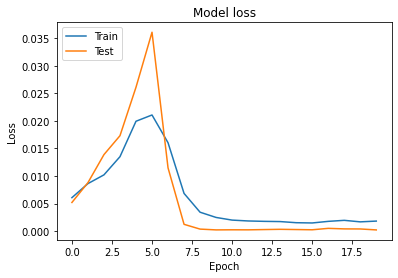

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
X_test = data.loc['2019-01-01':'2023-12-31']

In [ ]:
X_test

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


In [ ]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = X_test['Price'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 20
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 20, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)

In [ ]:
predicted_y[0]

array([59.84324], dtype=float32)

In [ ]:
org_y[0]

array([61.89])

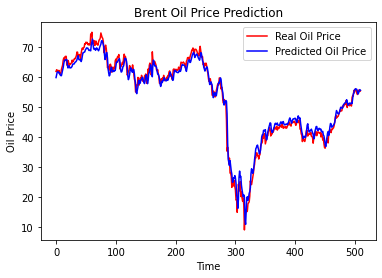

In [ ]:
plt.plot(org_y, color = 'red', label = 'Real Oil Price')
plt.plot(predicted_y, color = 'blue', label = 'Predicted Oil Price')
plt.title('Brent Oil Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(org_y, predicted_y)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(org_y, predicted_y)
print("R2:", r2)

MSE: 4.102318507450047
RMSE: 2.025418106823884
R2: 0.9799737325741295
